<a href="https://colab.research.google.com/github/hadif1999/iot_smoke_detection_ML/blob/main/smoke_detection_iot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#smoke_detection_iot project

###importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as tfk
import os

## preprocessing part

###reading data

In [ ]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/all_csv_excel_data/kaggle/")
data = pd.read_csv("smoke_detection_iot.csv")
data

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


Columns explanation :
<br>
Air Temperature
<br>
Air Humidity
<br>

TVOC: Total Volatile Organic Compounds; measured in parts per billion (Source)
<br>
eCO2: co2 equivalent concentration; calculated from different values like TVCO
<br>
Raw H2: raw molecular hydrogen; not compensated (Bias, temperature, etc.)
<br>
Raw Ethanol: raw ethanol gas (Source)¶
<br>
PM 1.0 and PM 2.5: particulate matter size < 1.0 µm (PM1.0). 1.0 µm < 2.5 µm (PM2.5)
<br>
Fire Alarm: ground truth is "1" if a fire is there
<br>
CNT: Sample counter
<br>
UTC: Timestamp UTC seconds
<br>
NC0.5/NC1.0 and NC2.5: Number concentration of particulate matter. This differs from PM because NC gives the actual number of particles in the air.
<br>
The raw NC is also classified by the particle size: < 0.5 µm (NC0.5); 0.5 µm < 1.0 µm (NC1.0); 1.0 µm < 2.5 µm (NC2.5)¶

## plotting the correlation of fire alarm with other columns

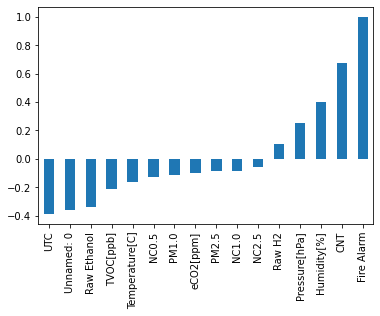

In [ ]:
data.corr()["Fire Alarm"].sort_values().plot(kind='bar')

## deleting most uncorrelated data from DF

In [ ]:
cols = ['Unnamed: 0',"PM2.5" , 'CNT' ,
             'UTC' , "Raw H2",
       'PM1.0' , 'NC0.5' ,'NC1.0' ,'NC2.5']

In [ ]:
data2 = data.copy()
data2.drop(cols, axis=1, inplace=True)
data2

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw Ethanol,Pressure[hPa],Fire Alarm
0,20.000,57.36,0,400,18520,939.735,0
1,20.015,56.67,0,400,18651,939.744,0
2,20.029,55.96,0,400,18764,939.738,0
3,20.044,55.28,0,400,18849,939.736,0
4,20.059,54.69,0,400,18921,939.744,0
...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,20569,936.670,0
62626,18.653,15.87,612,400,20588,936.678,0
62627,18.867,15.84,627,400,20582,936.687,0
62628,19.083,16.04,638,400,20566,936.680,0


## outlier detection

for this purpose we must calculate upper and lower band of data.
<br>
first we should calculate Q1 , Q3 by quantile method which it sortes data itself.
<br>
second IQR = Q3-Q1
<br>
third upper bound = Q3+ 1.5 * IQR
<br>
lower band = Q1 - 1.5 * IQR

Temperature[C]       AxesSubplot(0.125,0.799681;0.133621x0.0803191)
Humidity[%]       AxesSubplot(0.285345,0.799681;0.133621x0.0803191)
TVOC[ppb]          AxesSubplot(0.44569,0.799681;0.133621x0.0803191)
eCO2[ppm]         AxesSubplot(0.606034,0.799681;0.133621x0.0803191)
Raw Ethanol       AxesSubplot(0.766379,0.799681;0.133621x0.0803191)
Pressure[hPa]        AxesSubplot(0.125,0.703298;0.133621x0.0803191)
Fire Alarm        AxesSubplot(0.285345,0.703298;0.133621x0.0803191)
dtype: object

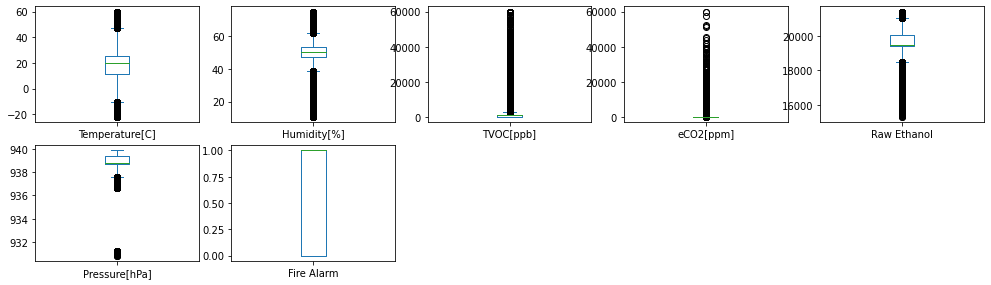

In [ ]:
data2.plot(kind='box', subplots=True, layout=(8,5), figsize=(17,20))

In [ ]:
def outlier_bands(df):

 Q1 = df.quantile(0.25)
 Q3 = df.quantile(0.75)

 IQR = Q3-Q1
 lower_band = Q1 - 1.5*IQR
 upper_band = Q3 + 1.5*IQR


 return lower_band,upper_band







In [ ]:
low_band,up_band = outlier_bands(data2)

data_clean = data2.copy()
rows = range( len(data_clean) )

try:
  for row in rows:
    row_con = ( (data_clean.iloc[row]> up_band).any() ) and ( (data_clean.iloc[row]< low_band).any() )
    if(row_con) : data_clean.drop(row,axis = 0,inplace=True)
    else: continue

except:print("ran succesfull but beacuse of changing length we got error")

ran succesfull but beacuse of changing length we got error


In [ ]:
data_clean.shape

(60184, 7)

In [ ]:
data_clean = data_clean.reset_index(drop = True)


In [ ]:
#data_clean.drop(["level_0","index"],axis=1,inplace=True)
data_clean

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw Ethanol,Pressure[hPa],Fire Alarm
0,20.000,57.36,0,400,18520,939.735,0
1,20.015,56.67,0,400,18651,939.744,0
2,20.029,55.96,0,400,18764,939.738,0
3,20.044,55.28,0,400,18849,939.736,0
4,20.059,54.69,0,400,18921,939.744,0
...,...,...,...,...,...,...,...
60179,18.438,15.79,625,400,20569,936.670,0
60180,18.653,15.87,612,400,20588,936.678,0
60181,18.867,15.84,627,400,20582,936.687,0
60182,19.083,16.04,638,400,20566,936.680,0


In [ ]:
data_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
index,60184.0,30335.793799,17752.546556,0.000,15045.750,30091.500,45137.2500,62629.000
Temperature[C],60184.0,15.758743,14.375699,-22.010,10.766,20.010,25.1585,59.930
Humidity[%],60184.0,48.791191,8.647876,10.740,47.650,50.370,53.2800,75.200
TVOC[ppb],60184.0,2001.133125,7957.849939,0.000,132.000,1017.000,1193.0000,60000.000
eCO2[ppm],60184.0,622.712216,1633.068235,400.000,400.000,400.000,437.0000,39185.000
Raw Ethanol,60184.0,19727.267031,594.772300,15317.000,19434.000,19485.000,20053.0000,21410.000
Pressure[hPa],60184.0,938.738460,1.116833,930.852,938.708,938.839,939.4750,939.861
Fire Alarm,60184.0,0.734614,0.441542,0.000,0.000,1.000,1.0000,1.000


In [ ]:
y = data_clean["Fire Alarm"]

In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
60179    0
60180    0
60181    0
60182    0
60183    0
Name: Fire Alarm, Length: 60184, dtype: int64

In [ ]:
y.value_counts()

1    44212
0    15972
Name: Fire Alarm, dtype: int64

In [ ]:
y = y.values
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
data_clean.isnull().sum()

index             0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw Ethanol       0
Pressure[hPa]     0
Fire Alarm        0
dtype: int64

In [ ]:
x = data_clean[["Temperature[C]","Humidity[%]","TVOC[ppb]","eCO2[ppm]","Raw Ethanol","Pressure[hPa]"]].values

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.15,random_state=10)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
x_ = (x- np.mean(x,0)) / np.std(x,0)

In [ ]:
#x_train = X_train.values
#y_train = Y_train
X_train

array([[-1.3406309 ,  0.38997124, -0.23717278, -0.13588632,  0.63260884,
         0.82624537],
       [ 0.7510805 ,  0.01004713, -0.09162874, -0.13588632, -0.52921381,
        -0.0413424 ],
       [ 0.59671348,  0.094862  , -0.24724504, -0.13588632, -0.0180791 ,
         0.94544906],
       ...,
       [ 0.40533733,  0.44225438, -0.24258662, -0.13588632,  0.69313795,
         0.80742373],
       [ 0.7510805 ,  0.07278689, -0.11769069, -0.1200495 , -0.45523379,
         0.07517248],
       [ 0.07914222,  0.01004713, -0.09288777, -0.12126771, -0.51744426,
        -0.02969091]])

### making nerual model generator

In [ ]:
data_clean.shape[1:]

(8,)

In [ ]:

def model_gen ( n_HD_layer , n_neuron_list , input_shape = data_clean.shape[1:], ac_f = "sigmoid"):

  if not n_HD_layer == len(n_neuron_list) : print("number of hidden layers must be equal to len of list of number of neurons in each layer ")

  layer_list = []

  input_layer = tfk.layers.Input(input_shape,name = "input_layer")
  layer_list.append(input_layer)

  for i in range(n_HD_layer):

    hd_layer = tfk.layers.Dense(n_neuron_list[i], ac_f ,False,"glorot_normal",name = "hd_layer{}".format(i+1))(layer_list[-1])
    batch_layer = tfk.layers.BatchNormalization(name = "batch_layer{}".format(i+1))(hd_layer)
    drop_layer = tfk.layers.Dropout( 0.4 ,name = "drop_layer{}".format(i+1) )(batch_layer)

    layer_list.append(hd_layer)
    layer_list.append(batch_layer)
    layer_list.append(drop_layer)

  #drop_layer_final = tfk.layers.Dropout(0.4)(layer_list[-1])
  #layer_list.append(drop_layer_final)

  out_layer = tfk.layers.Dense(1,"sigmoid",False,name = "output_layer")(layer_list[-1])

  model = tfk.Model(inputs=input_layer , outputs =out_layer,name = "model01" )

  return model



In [ ]:
model1 = model_gen(4 , [250,200,150,100] ,input_shape = X_train.shape[1:])
model1.summary()

Model: "model01"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 6)]               0         
                                                                 
 hd_layer1 (Dense)           (None, 250)               1500      
                                                                 
 batch_layer1 (BatchNormaliz  (None, 250)              1000      
 ation)                                                          
                                                                 
 drop_layer1 (Dropout)       (None, 250)               0         
                                                                 
 hd_layer2 (Dense)           (None, 200)               50000     
                                                                 
 batch_layer2 (BatchNormaliz  (None, 200)              800       
 ation)                                                    

In [ ]:
model1.compile(optimizer = "Adam",loss="binary_crossentropy",
               metrics = ["accuracy","binary_accuracy",tfk.metrics.AUC(),tfk.metrics.Precision()],)

In [ ]:
hist1 = model1.fit(x = X_train, y = Y_train , batch_size = 24 , epochs = 20, validation_split=0.15)

Epoch 1/20
1812/1812 [==============================] - 15s 8ms/step - loss: 0.1911 - accuracy: 0.9129 - binary_accuracy: 0.9129 - auc_7: 0.9701 - precision_7: 0.9405 - val_loss: 0.0959 - val_accuracy: 0.9497 - val_binary_accuracy: 0.9497 - val_auc_7: 0.9942 - val_precision_7: 0.9862
Epoch 2/20
1812/1812 [==============================] - 13s 7ms/step - loss: 0.1197 - accuracy: 0.9467 - binary_accuracy: 0.9467 - auc_7: 0.9883 - precision_7: 0.9600 - val_loss: 0.0655 - val_accuracy: 0.9781 - val_binary_accuracy: 0.9781 - val_auc_7: 0.9971 - val_precision_7: 0.9785
Epoch 3/20
1812/1812 [==============================] - 13s 7ms/step - loss: 0.0935 - accuracy: 0.9598 - binary_accuracy: 0.9598 - auc_7: 0.9929 - precision_7: 0.9693 - val_loss: 0.0512 - val_accuracy: 0.9827 - val_binary_accuracy: 0.9827 - val_auc_7: 0.9986 - val_precision_7: 0.9885
Epoch 4/20
1812/1812 [==============================] - 13s 7ms/step - loss: 0.0781 - accuracy: 0.9681 - binary_accuracy: 0.9681 - auc_7: 0.9949 

In [ ]:
model1.save("smoke_detection_iot.h5")

### model evaluation



In [ ]:
eval = model1.evaluate(X_test,Y_test)

283/283 [==============================] - 1s 4ms/step - loss: 0.0254 - accuracy: 0.9858 - binary_accuracy: 0.9858 - auc_7: 0.9999 - precision_7: 0.9812


In [ ]:
print("final accuracy for test data is : " , eval[1])

final accuracy for test data is :  0.9858219027519226


###Classification Report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_hat = model1.predict(X_test)
y_hat_ = np.round(y_hat.T[0])
print(confusion_matrix( Y_test , y_hat_ )  )


283/283 [==============================] - 1s 3ms/step
[[2279  127]
 [   1 6621]]


In [ ]:
print(classification_report(Y_test, y_hat_, target_names=["Alarm", "No Alarm"]))

              precision    recall  f1-score   support

       Alarm       1.00      0.95      0.97      2406
    No Alarm       0.98      1.00      0.99      6622

    accuracy                           0.99      9028
   macro avg       0.99      0.97      0.98      9028
weighted avg       0.99      0.99      0.99      9028

